In [19]:
from statsmodels.tsa.vector_ar.var_model import VAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller


CURR_DIR_PATH = os.getcwd()
FILE_PATH = CURR_DIR_PATH + '/data/'

emission_df = pd.read_csv(f'{FILE_PATH}transformed_sweden_data/sweden_cities_emissions.csv')
emission_df = emission_df[emission_df['Year'] >= 2010]
emission_df['Year'] = pd.to_datetime(emission_df['Year'], format='%Y')
emission_df = emission_df.drop('Region', axis=1)
emission_df_dupes = emission_df[emission_df.duplicated(keep=False) == True]
emission_df_dupes

,Year,City,Population,Waste And Sewage,Machinery,Electricity And District Heating,Other Heating,Agriculture,Transportation,Industry,Total Emissions


In [20]:
if 1 == 1:
    emission_df = emission_df.drop_duplicates()

In [21]:
# pivot df to have regions as columns and years as index
emission_pivot = emission_df.pivot(index='Year', columns='City', values='Total Emissions')


In [22]:
emission_pivot_log = np.log(emission_pivot) # np.log to reduce range of data and stabilize variance
emission_pivot_log

City,AAmaal,AAnge,AAre,AArjaeng,AAsele,AAstorp,AAtvidaberg,AElmhult,AElvdalen,AElvkarleby,...,Varberg,Vaxholm,Vellinge,Vetlanda,Vilhelmina,Vimmerby,Vindeln,Vingaaker,Ydre,Ystad
Year,,,,,,,,,,,,,,,,,,,,,
2010-01-01,3.756390,4.370097,4.047999,3.992434,3.353673,4.486477,3.530077,4.128024,3.837746,4.085382,...,5.504499,2.958907,4.329658,4.812651,3.660648,4.193137,3.597503,3.571642,2.908047,4.485031
2015-01-01,3.480527,4.315487,3.879355,3.784293,3.188341,4.041535,3.379562,4.031837,3.751634,3.525426,...,5.293514,2.948801,4.155620,4.705252,3.460581,4.030193,3.390722,3.395414,2.703851,4.356752
2016-01-01,3.441157,4.161072,3.846493,3.729981,3.156987,3.994903,3.363614,4.008122,3.688075,3.221094,...,5.266865,2.949324,4.113841,4.605907,3.415178,3.969285,3.416777,3.358047,2.689404,4.306489
2017-01-01,3.416743,4.181205,3.811181,3.722015,3.114497,3.971720,3.297850,4.030755,3.695574,3.223885,...,5.327761,3.033871,4.112029,4.600393,3.397903,3.989981,3.382673,3.365848,2.636785,4.314606
2018-01-01,3.451753,4.187239,3.345060,3.684156,3.098605,3.933915,3.216973,3.972359,3.547516,3.135649,...,5.325122,2.979893,4.126083,4.490906,3.382649,3.964354,3.373603,3.269577,2.554414,4.213008
2019-01-01,3.443900,4.203299,3.360281,3.657025,3.155423,3.889486,3.208180,3.946314,3.583966,3.126910,...,5.320262,2.946118,4.107702,4.476015,3.388711,3.956871,3.350578,3.339587,2.548613,4.184844
2020-01-01,3.379236,4.098817,3.280036,3.592015,3.016183,3.796362,3.073618,3.858890,3.533045,3.058937,...,5.239975,2.857998,4.054101,4.393114,3.350854,3.827225,3.279710,3.199516,2.447838,4.135612
2021-01-01,3.377814,4.169554,3.273185,3.618377,3.057848,3.815837,3.092834,3.890338,3.527856,3.076797,...,5.250706,2.872011,4.051076,4.441239,3.340941,3.856356,3.279465,3.212004,2.444122,4.133925
2022-01-01,3.269110,4.154325,3.169719,3.501116,2.909113,3.683808,3.008846,3.799988,3.398629,3.347211,...,5.161757,2.860343,3.938023,4.342591,3.210412,3.751162,3.170398,3.118905,2.358683,4.032232


In [23]:
# do .diff() to make data stationary (e.g. mean doesnt't change along time series). 
emission_pivot_diff = emission_pivot_log.diff().dropna() # calcs difference between each element and the previous, need dropna because a NaN is introduced as first entry has no prev entry
emission_pivot_diff

City,AAmaal,AAnge,AAre,AArjaeng,AAsele,AAstorp,AAtvidaberg,AElmhult,AElvdalen,AElvkarleby,...,Varberg,Vaxholm,Vellinge,Vetlanda,Vilhelmina,Vimmerby,Vindeln,Vingaaker,Ydre,Ystad
Year,,,,,,,,,,,,,,,,,,,,,
2015-01-01,-0.275864,-0.054609,-0.168644,-0.208141,-0.165332,-0.444941,-0.150515,-0.096187,-0.086112,-0.559956,...,-0.210985,-0.010105,-0.174038,-0.107399,-0.200067,-0.162944,-0.206780,-0.176227,-0.204196,-0.128280
2016-01-01,-0.039370,-0.154415,-0.032862,-0.054312,-0.031354,-0.046632,-0.015948,-0.023715,-0.063559,-0.304332,...,-0.026649,0.000523,-0.041779,-0.099345,-0.045404,-0.060909,0.026055,-0.037367,-0.014447,-0.050262
2017-01-01,-0.024414,0.020133,-0.035312,-0.007965,-0.042490,-0.023183,-0.065764,0.022633,0.007498,0.002791,...,0.060896,0.084547,-0.001812,-0.005514,-0.017275,0.020696,-0.034104,0.007801,-0.052619,0.008116
2018-01-01,0.035010,0.006034,-0.466122,-0.037859,-0.015892,-0.037805,-0.080877,-0.058395,-0.148058,-0.088236,...,-0.002639,-0.053978,0.014054,-0.109487,-0.015254,-0.025627,-0.009071,-0.096271,-0.082370,-0.101598
2019-01-01,-0.007853,0.016061,0.015221,-0.027131,0.056818,-0.044429,-0.008793,-0.026046,0.036450,-0.008739,...,-0.004860,-0.033775,-0.018381,-0.014891,0.006062,-0.007483,-0.023024,0.070010,-0.005801,-0.028164
2020-01-01,-0.064664,-0.104482,-0.080245,-0.065010,-0.139240,-0.093124,-0.134562,-0.087423,-0.050921,-0.067973,...,-0.080287,-0.088121,-0.053600,-0.082901,-0.037858,-0.129646,-0.070868,-0.140072,-0.100776,-0.049231
2021-01-01,-0.001422,0.070737,-0.006850,0.026362,0.041665,0.019475,0.019216,0.031448,-0.005189,0.017860,...,0.010731,0.014013,-0.003025,0.048125,-0.009913,0.029131,-0.000244,0.012488,-0.003715,-0.001688
2022-01-01,-0.108705,-0.015228,-0.103466,-0.117261,-0.148735,-0.132029,-0.083988,-0.090350,-0.129227,0.270414,...,-0.088949,-0.011668,-0.113053,-0.098648,-0.130529,-0.105194,-0.109067,-0.093099,-0.085440,-0.101693


In [24]:
model = VAR(emission_pivot_diff)
model_fit = model.fit()

forecast_steps = 3 # steps = number of years to forecast
lag_order = model_fit.k_ar # retrieve optimal lag_order (= amount of previous steps used in model) from model_fit

forecast_input = emission_pivot_diff.values[-lag_order:] # conv to np array, slice last lag_order to use when forecasting. If lag_order = 3, returns array with 3 nested arrays with 19 entries(each region)
forecast_diff = model_fit.forecast(y=forecast_input, steps=forecast_steps) # returns array with nested array of forecasted data for each step, predictions also in diffferences 
forecast_diff


c:\repos\graduationa_project_carbon_calculator\graduation_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


array([[-2.83579174e-02, -3.60677000e-03, -6.72398601e-02,
        -2.02047325e-02, -3.61958155e-02, -2.57594763e-02,
        -3.53147099e-02,  1.77662874e-03, -4.31948561e-02,
        -1.92697096e-02, -7.35400721e-02,  3.68548123e-02,
         5.13856197e-03, -3.71786075e-02, -2.06057827e-02,
         2.39296612e-02, -2.50979818e-02, -8.14449332e-02,
        -4.02764342e-02, -1.55266992e-03,  3.21135364e-02,
         2.28271800e-02, -3.42632234e-02,  1.78228312e-02,
        -9.38680799e-02,  1.25307720e-02, -1.04879853e-01,
        -5.89083896e-03,  2.03304440e-02, -3.42712272e-02,
        -1.59212604e-02, -4.20440647e-02,  6.15559854e-03,
        -5.84384269e-02,  4.35566016e-02, -7.70335702e-02,
         5.36481434e-03, -6.91233613e-02, -8.38241480e-03,
        -1.42500866e-01, -5.08880906e-03,  3.99329713e-03,
         2.22490536e-02, -2.38667818e-02,  1.24997874e-02,
        -2.25339991e-02, -3.64292820e-02,  3.83671072e-02,
        -6.25085297e-02, -1.41392080e-02, -2.02760588e-0

In [25]:
# create range of future years, length matching steps
forecast_index = pd.date_range(
    # start at last known data point, starts forecast at start + 1 year and predicts three years
    start=emission_pivot.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='YS') # YS = year start, start of year as frequency (yyyy-01-01)

# create a forecast df (three rows, matching steps): use prev range as index, forecast_diff as values and get column names from emission_pivot (need to be identical for later)
forecast_diff_df = pd.DataFrame(
    forecast_diff, index=forecast_index, columns=emission_pivot.columns)
forecast_diff_df 

City,AAmaal,AAnge,AAre,AArjaeng,AAsele,AAstorp,AAtvidaberg,AElmhult,AElvdalen,AElvkarleby,...,Varberg,Vaxholm,Vellinge,Vetlanda,Vilhelmina,Vimmerby,Vindeln,Vingaaker,Ydre,Ystad
2023-01-01,-0.028358,-0.003607,-0.067240,-0.020205,-0.036196,-0.025759,-0.035315,0.001777,-0.043195,-0.019270,...,0.010175,0.037049,-0.021714,-0.024906,-0.038195,-0.008621,-0.019336,-0.026405,-0.038451,-0.024016
2024-01-01,-0.023340,0.013391,-0.217642,-0.051080,-0.048170,-0.057520,-0.061806,-0.038067,-0.093701,0.057607,...,-0.005907,0.006863,-0.028957,-0.070140,-0.051451,-0.025822,-0.041456,-0.047432,-0.063819,-0.068973
2025-01-01,-0.010417,-0.007198,-0.150209,-0.037990,-0.012364,-0.048240,-0.051330,-0.035705,-0.045808,-0.031740,...,-0.005291,-0.019243,-0.016553,-0.057093,-0.019778,-0.025546,-0.026034,-0.018829,-0.046642,-0.051676


In [26]:
# conv forecast back to original scale 
last_log_values = emission_pivot_log.iloc[-1]
forecast_log_original = last_log_values + forecast_diff_df.cumsum() # cumulative sum of forecast diff values, basically undo the diff
forecast_original = np.exp(forecast_log_original) # "undo" the log operation

# append forecast data (now in original scale) to historical data
combined_series = pd.concat([emission_pivot, forecast_original])
print(combined_series)



City           AAmaal      AAnge       AAre   AArjaeng     AAsele    AAstorp  \
2010-01-01  42.793674  79.051269  57.282698  54.186642  28.607608  88.807997   
2015-01-01  32.476825  74.850095  48.392985  44.004556  24.248160  56.913659   
2016-01-01  31.223051  64.140257  46.828555  41.678308  23.499685  54.320575   
2017-01-01  30.470006  65.444653  45.203798  41.347645  22.522109  53.075736   
2018-01-01  31.555658  65.840741  28.362266  39.811517  22.167007  51.106679   
2019-01-01  31.308833  66.906723  28.797279  38.745893  23.462960  48.885747   
2020-01-01  29.348349  60.268956  26.576724  36.307156  20.413216  44.538859   
2021-01-01  29.306639  64.686575  26.395285  37.277016  21.281709  45.414743   
2022-01-01  26.287921  63.708959  23.800793  33.152432  18.340515  39.797657   
2023-01-01  25.552921  63.479589  22.253050  32.489318  17.688535  38.785581   
2024-01-01  24.963424  64.335380  17.900653  30.871434  16.856669  36.617593   
2025-01-01  24.704731  63.873951  15.404

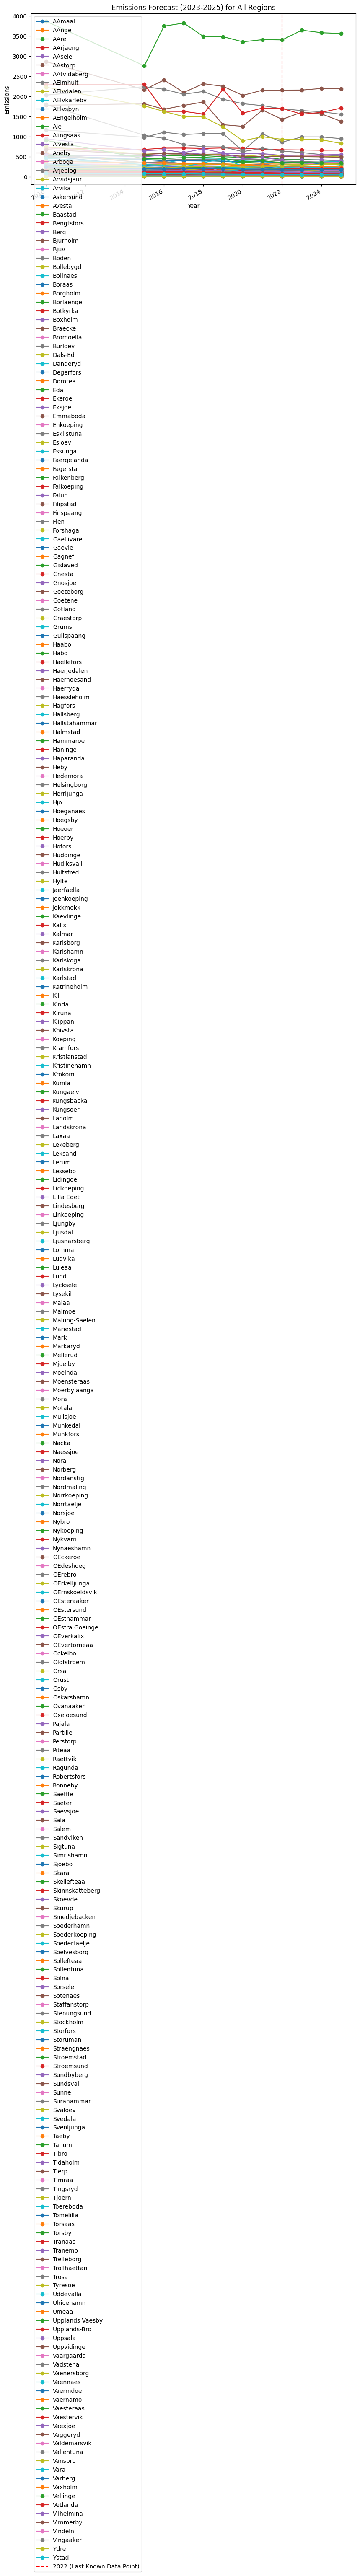

In [27]:
combined_series.plot(figsize=(10, 6), marker='o')
plt.axvline(x=emission_pivot.index[-1], color='red',
            linestyle='--', label='2022 (Last Known Data Point)') #vertical line to mark split between historical/forecast data
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Emissions Forecast (2023-2025) for All Regions')
plt.legend()
plt.show()